# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 29/08/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

Apenas lendo o nome das colunas e o que elas representam, a variável que parece mais estar relacionada com o **TARGET** me parecer ser, inicialmente, a ***avgDeathsPerYear***, ou seja, a média de mortes reportadas devido ao câncer.

A impressão que fica é que, quanto maior a média de mortes reportada, maior será a taxa de mortes por câncer.

2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

In [1]:
import pandas as pd

df = pd.read_csv('cancer_EUA.csv', sep=';')

df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,"1397,0","890,7705285028013","164,9","489,8","61898,0","260131,0","11,2","499,7482038","(61494.5, 125635]","39,3",...,NaN,"41,6","32,9","14,0","81,78052858","2,594728333","4,821857102","1,843478533","52,85607588","6,118831029"
1,"173,0","669,0883630446194","161,3","411,6","48127,0","43269,0","18,6","23,11123437","(48021.6, 51046.4]","33,0",...,"53,8","43,6","31,1","15,3","89,22850915","0,969102455","2,246232585","3,741351531","45,37250044","4,333095578"
2,"102,0","744,0834616315638","174,7","349,7","49348,0","21026,0","14,6","47,56016361","(48021.6, 51046.4]","45,0",...,"43,5","34,9","42,1","21,1","90,9221902","0,739673391","0,465898175","2,747358309","54,44486837","3,729487817"
3,"427,0","953,7733391577932","194,8","430,4","44243,0","75882,0","17,1","342,6372526","(42724.4, 45201]","42,8",...,"40,3","35,0","45,3","25,0","91,74468649","0,782625968","1,16135867","1,362643183","51,02151448","4,603840773"
4,"57,0","646,1944378671657","144,4","350,1","49955,0","10321,0","12,5","0,0","(48021.6, 51046.4]","48,3",...,"43,9","35,1","44,0","22,7","94,10402393","0,270192029","0,665830358","0,492135482","54,02745995","6,796657382"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   avgAnnCount              3047 non-null   object
 1   avgDeathsPerYear         3047 non-null   object
 2   TARGET_deathRate         3047 non-null   object
 3   incidenceRate            3047 non-null   object
 4   medIncome                3047 non-null   object
 5   popEst2015               3047 non-null   object
 6   povertyPercent           3047 non-null   object
 7   studyPerCap              3047 non-null   object
 8   binnedInc                3047 non-null   object
 9   MedianAge                3047 non-null   object
 10  MedianAgeMale            3047 non-null   object
 11  MedianAgeFemale          3047 non-null   object
 12  Geography                3047 non-null   object
 13  AvgHouseholdSize         3047 non-null   object
 14  PercentMarried           3047 non-null  

In [2]:
# Todas as tabelas estão como string. É necessário fazer a conversão para float
# Dropando colunas Geography (string) e binnedInc
# O motivo de ter dropado a binnedInc se dá pelo fato dela conter dois números. Não consegui compreender
# como utilizá-los. 

df = df.drop(['Geography', 'binnedInc'], axis=1)

for column in df.columns:
    df[column] = df[column].str.replace(',', '.')

df = df.astype(float)

df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,843.919853,178.491008,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,143.907390,27.629797,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,294.277385,56.000000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,746.660187,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,842.516774,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,939.423171,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,1553.351487,293.900000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [3]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

In [4]:
df.isnull().sum()/df.shape[0]

avgAnnCount                0.000000
avgDeathsPerYear           0.000000
TARGET_deathRate           0.000000
incidenceRate              0.000000
medIncome                  0.000000
popEst2015                 0.000000
povertyPercent             0.000000
studyPerCap                0.000000
MedianAge                  0.000000
MedianAgeMale              0.000000
MedianAgeFemale            0.000000
AvgHouseholdSize           0.000000
PercentMarried             0.000000
PctNoHS18_24               0.000000
PctHS18_24                 0.000000
PctSomeCol18_24            0.749918
PctBachDeg18_24            0.000000
PctHS25_Over               0.000000
PctBachDeg25_Over          0.000000
PctEmployed16_Over         0.049885
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctPrivateCoverageAlone    0.199869
PctEmpPrivCoverage         0.000000
PctPublicCoverage          0.000000
PctPublicCoverageAlone     0.000000
PctWhite                   0.000000
PctBlack                   0

In [3]:
# Dropando colunas com dados nulos

df = df.drop(['PctSomeCol18_24', 'PctPrivateCoverageAlone', 'PctEmployed16_Over'], axis=1)

<AxesSubplot:>

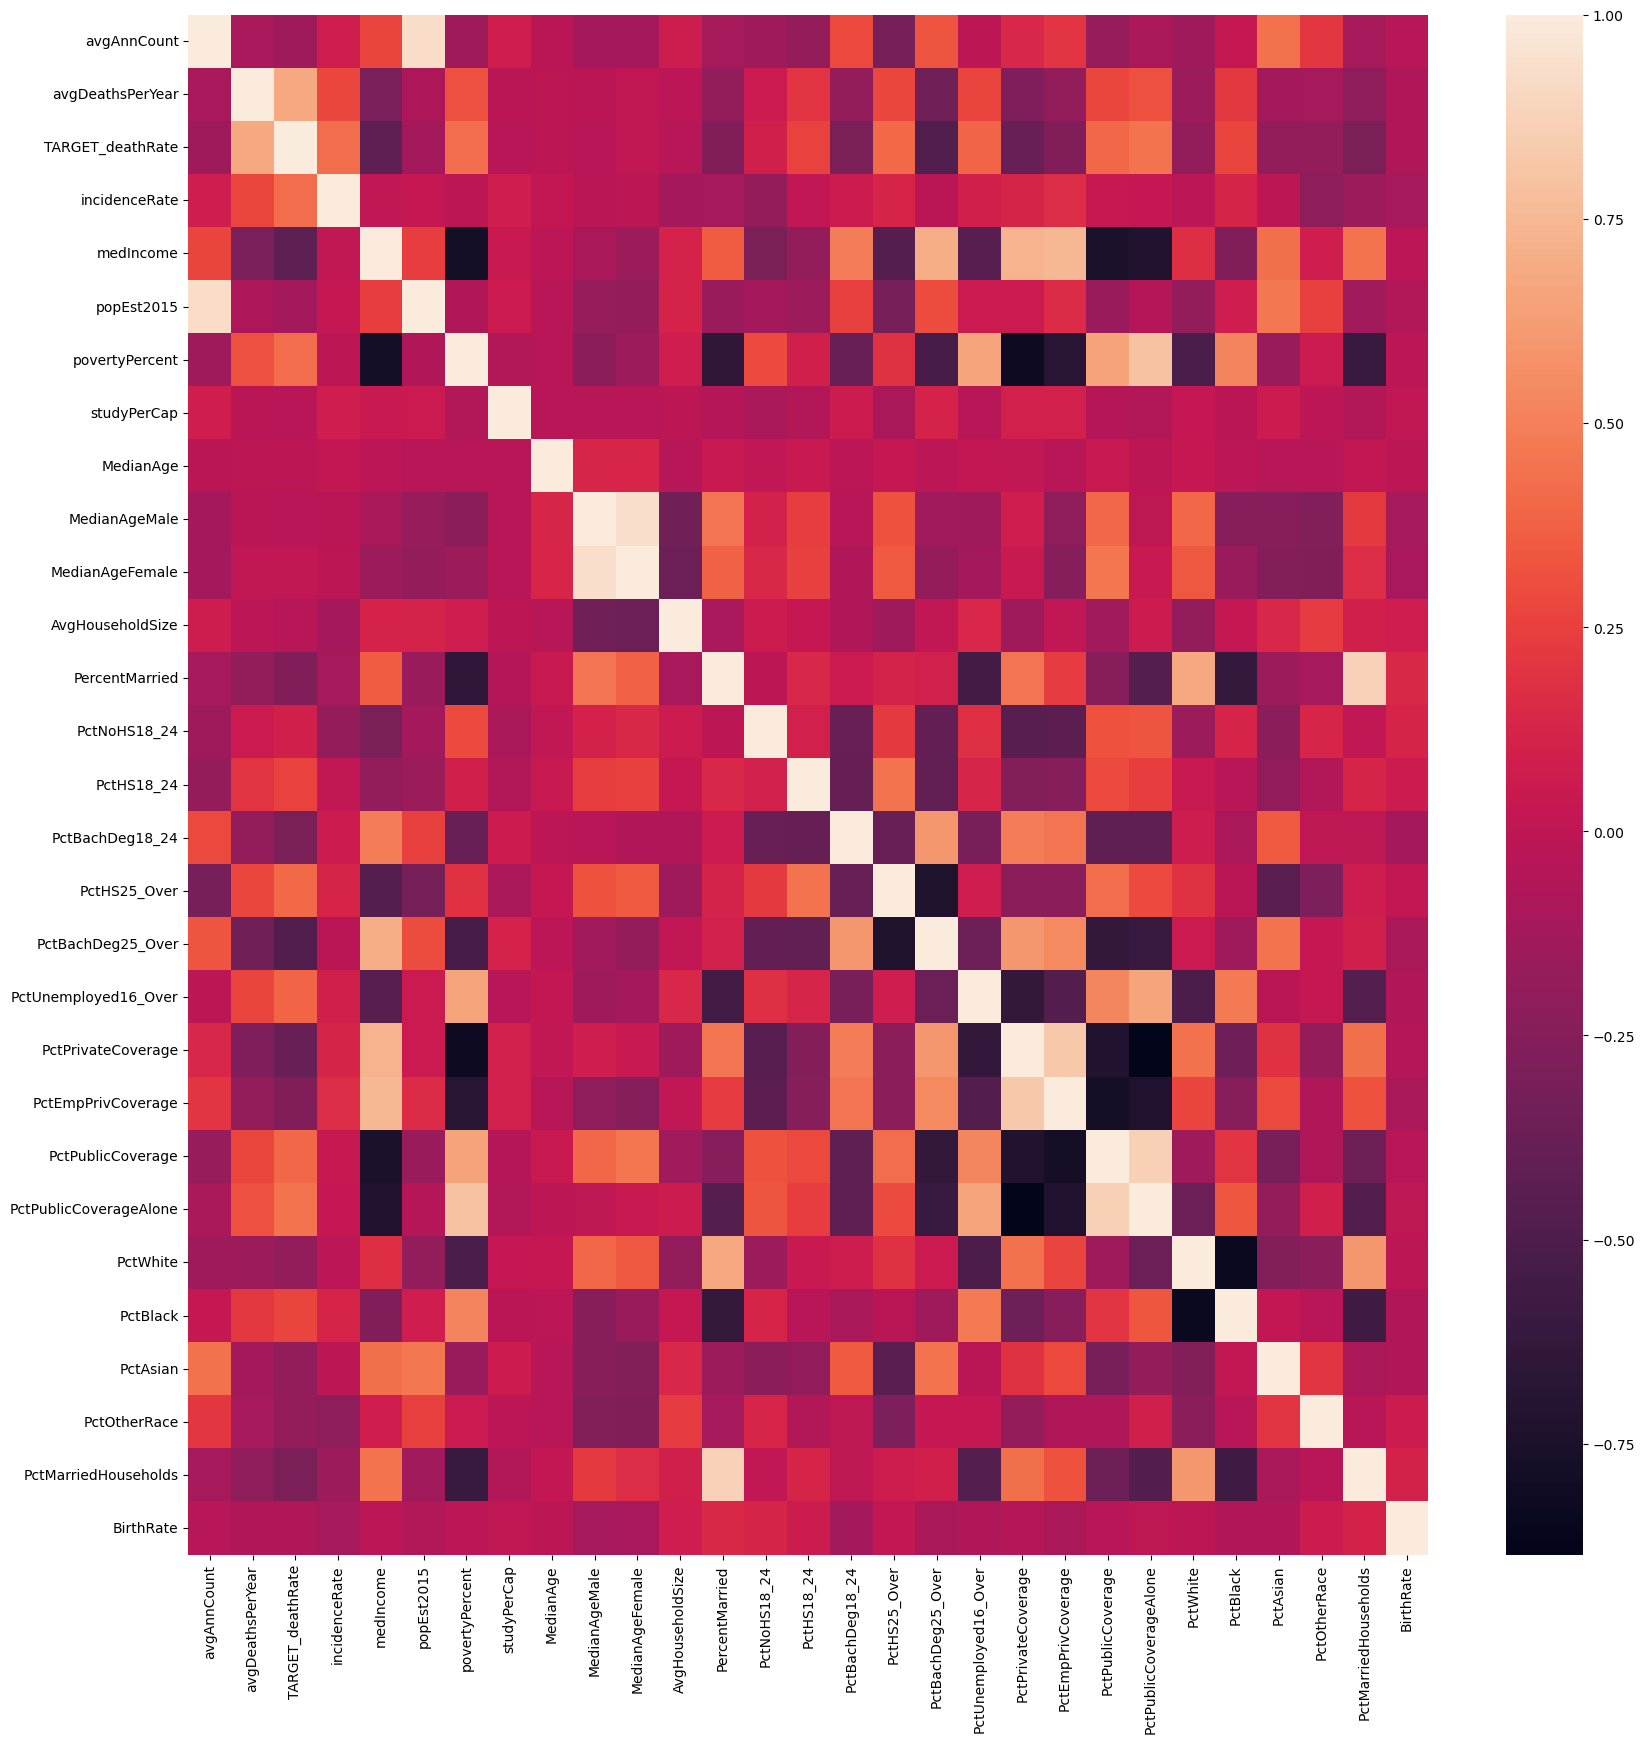

In [5]:
# Verificando correlação entre variáveis

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [12]:
# Verificando correlação especificamente com o alvo

corr_target = df.corr()['TARGET_deathRate'].abs().sort_values(ascending=False)
corr_target

TARGET_deathRate          1.000000
avgDeathsPerYear          0.678856
PctBachDeg25_Over         0.488874
PctPublicCoverageAlone    0.451853
medIncome                 0.432694
povertyPercent            0.428604
PctHS25_Over              0.412030
PctPublicCoverage         0.409789
incidenceRate             0.400137
PctPrivateCoverage        0.388807
PctUnemployed16_Over      0.377878
PctMarriedHouseholds      0.293929
PctBachDeg18_24           0.286872
PctEmpPrivCoverage        0.271276
PctHS18_24                0.262683
PercentMarried            0.260070
PctBlack                  0.249774
PctOtherRace              0.190181
PctAsian                  0.187370
PctWhite                  0.171722
avgAnnCount               0.142828
popEst2015                0.119640
PctNoHS18_24              0.085814
BirthRate                 0.083181
AvgHouseholdSize          0.038960
MedianAgeMale             0.021839
studyPerCap               0.020640
MedianAgeFemale           0.017865
MedianAge           

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Count'>

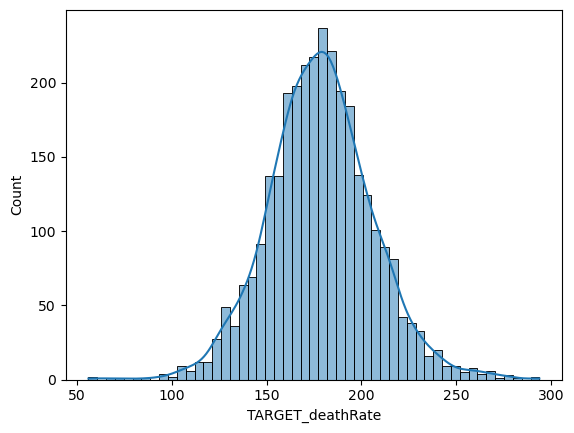

In [9]:
# Verificando distribuição do alvo

sns.histplot(data=df, x="TARGET_deathRate", kde=True)

In [11]:
# Verificando o enviesamento

df['TARGET_deathRate'].skew()

0.12931340277335948

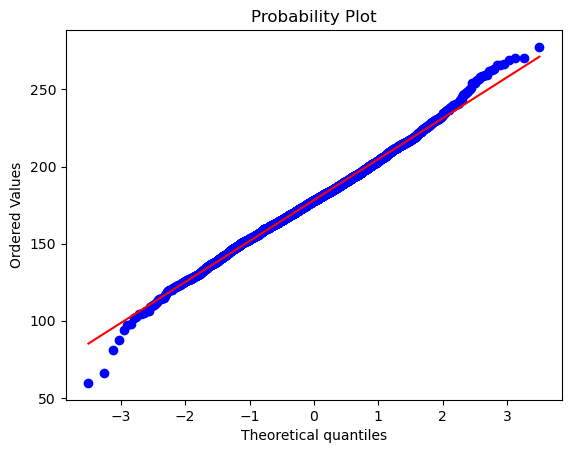

In [6]:
# Fazendo uma segunda checagem

import numpy as np
import pylab
from scipy import stats

stats.probplot(df['TARGET_deathRate'], dist='norm', plot=pylab)
pylab.show()

In [18]:
# Verificando correlações que são iguais ou maiores que 50%

corr_target[corr_target >= 0.5]

TARGET_deathRate    1.000000
avgDeathsPerYear    0.678856
Name: TARGET_deathRate, dtype: float64

<br>

Fazendo uma análise inicial dos dados, verificou-se, inicialmente, que todas as colunas (com exceção de uma) continham valores numéricos. Foi necessário fazer uma limpeza inicial para conversão dos dados e foi necessário descartar uma das colunas pelo fato de ela conter dois números e não existir uma especificação de como aqueles números deveriam ser interpretados.

Também verificou-se que a coluna que trazia informação sobre a quantidade de jovens entre 18 e 24 anos que tinham feito faculdade tinha mais de 70% de dados nulos, e a coluna que continha o percentual de pessoas que possuiam apenas coberturas com planos de saúde tinha cerca de 20% de dados nulos. A coluna que descrevia o percentual de pessoas com mais de 16 empregadas tinha um número baixo de valores nulos, menos de 5%, o que permitiria a substituição desses valores pela média ou pela moda, mas preferiu-se, inicialmente, descartar todas as colunas com dados nulos. Felizmente, as demais 29 colunas não continham nenhum dado nulo.

Pode se observar que o alvo possui uma distribuição normal de dados, o que é bom, e que apenas uma coluna, a média de mortes por ano, possui uma relação mais forte com o alvo. Todas as demais colunas possuem correção inferior à 50%.

<br>

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

In [23]:
print("Mediana:", df['TARGET_deathRate'].median())
print("Variância:", df['TARGET_deathRate'].var())

Mediana: 178.1
Variância: 763.4056643489234


<br>
A distribuição é normal e simétrica, com um pequeno enviesamento positivo (0.12).

Média: 178.49

Mediana: 178.1

Variância : 763.40

<br>

3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

Irei utilizar a média de mortes relatadas por ano que possui a maior correlação com o alvo.

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

<AxesSubplot:xlabel='avgDeathsPerYear'>

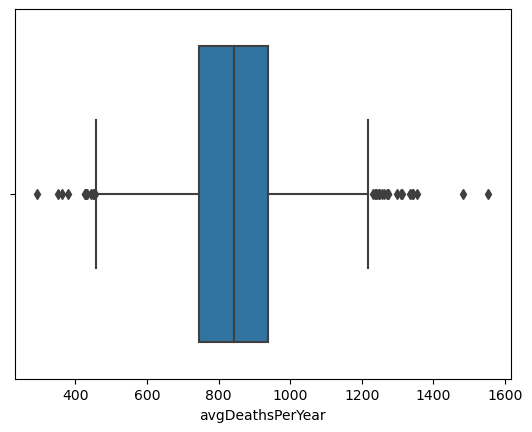

In [24]:
# Verificando outliers

sns.boxplot(x=df['avgDeathsPerYear'])

<AxesSubplot:xlabel='avgDeathsPerYear'>

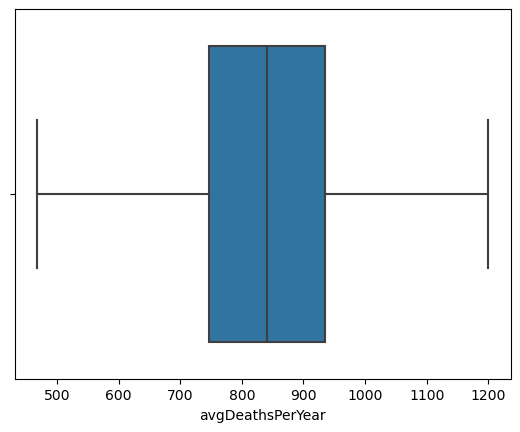

In [7]:
# Removendo outliers

df = df[(df['avgDeathsPerYear'] < 1200) & (df['avgDeathsPerYear'] > 460)]

sns.boxplot(x=df['avgDeathsPerYear'])

In [41]:
# Verificando enviesamento da variável escolhida

df['avgDeathsPerYear'].skew()

0.03509633364702971

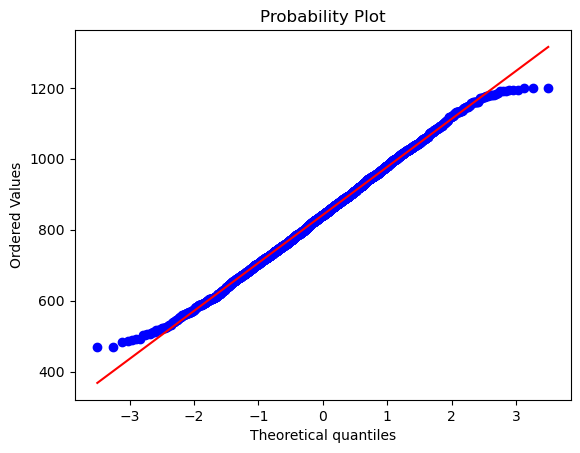

In [42]:
# Verificando distribuição da variável escolhida

stats.probplot(df['avgDeathsPerYear'], dist='norm', plot=pylab)
pylab.show()

<AxesSubplot:xlabel='TARGET_deathRate'>

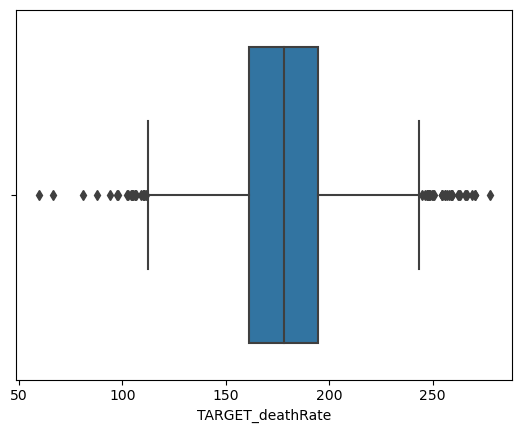

In [44]:
# Verificando outliers do target

sns.boxplot(x=df['TARGET_deathRate'])

<AxesSubplot:xlabel='TARGET_deathRate'>

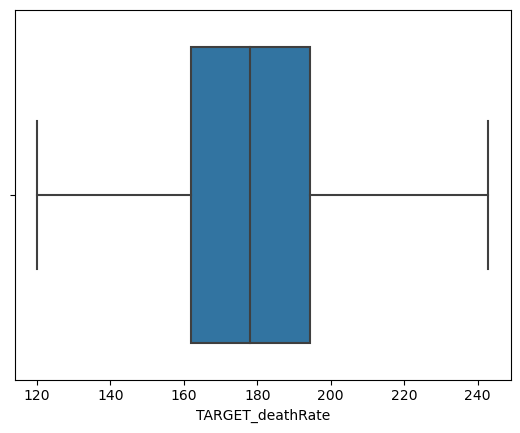

In [8]:
# Removendo outliers

df = df[(df['TARGET_deathRate'] < 243) & (df['TARGET_deathRate'] > 120)]

sns.boxplot(x=df['TARGET_deathRate'])

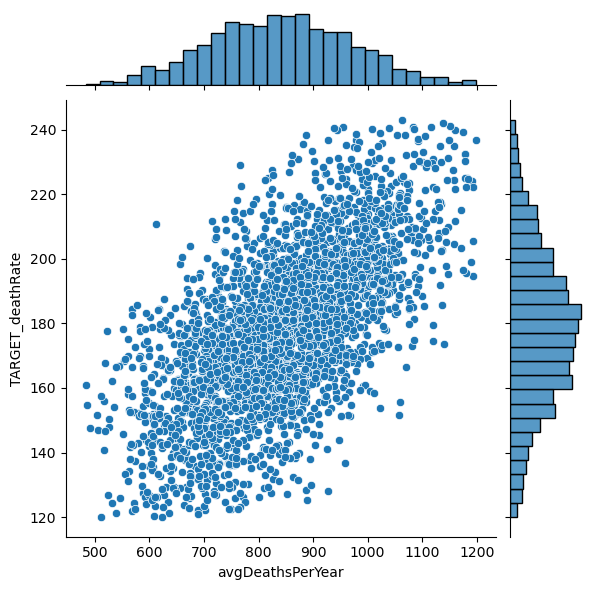

In [67]:
# Verificando correlação graficamente após remoção de outliers

sns.jointplot(data=df, x='avgDeathsPerYear', y='TARGET_deathRate')
plt.show()

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

In [24]:
# Treinando o modelo

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['avgDeathsPerYear']
y = df['TARGET_deathRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Corrigindo dimensões dos dados de treino
X_train = X_train.values.reshape(-1, 1)

simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train, y_train)

LinearRegression()

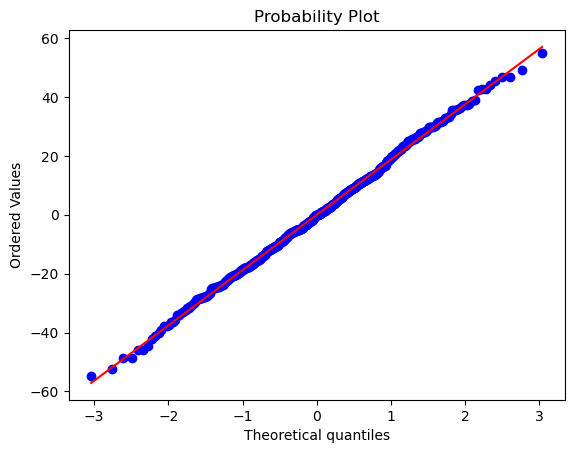

In [25]:
# Fazendo previsões com os dados de teste

X_test = X_test.values.reshape(-1, 1)
y_pred = simple_linear_model.predict(X_test)

# Checando os resíduos

residue = y_test - y_pred

stats.probplot(residue, dist='norm', plot=pylab)
pylab.show()

In [26]:
# Verificando o enviesamento

residue.skew()

0.04170116861912982

In [27]:
# Fazendo teste
from scipy.stats import normaltest
    
test_stat, p = normaltest(y_test - y_pred)

# Usando significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")


Falha em rejeitar H_0: amostra parece ser normal


    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

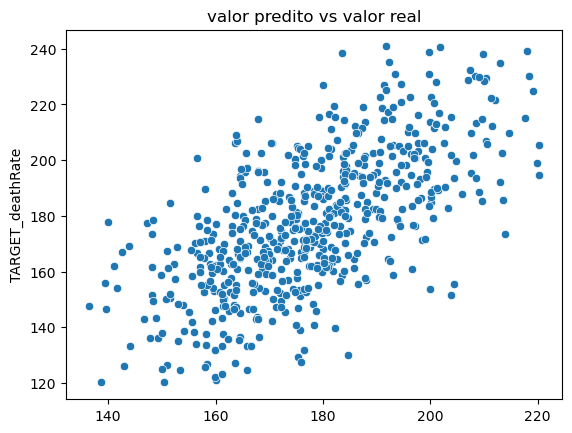

In [82]:
plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.show()

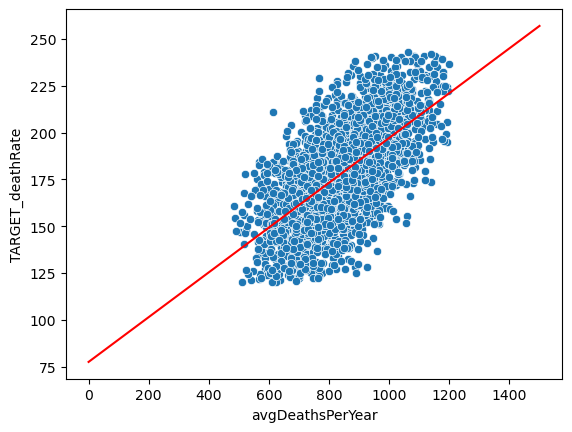

In [102]:
sns.scatterplot(data=df, x='avgDeathsPerYear', y='TARGET_deathRate')
x = np.linspace(0, 1500, 1000)
y = simple_linear_model.intercept_ + simple_linear_model.coef_[0]*x
plt.plot(x, y, color="red")
plt.show()

In [28]:
from sklearn import metrics

print('\nR^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred, squared=False))


R^2: 0.4311513550982494
MAE: 14.930774801173625
MSE: 349.4934984911096
RMSE: 18.694745210649693


4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

In [29]:
# Instanciando o modelo
model = LinearRegression()

# Separando as variáveis e o alvo
variables = df.drop(['TARGET_deathRate'], axis=1)
target = df['TARGET_deathRate']

# Separando os dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.2, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

LinearRegression()

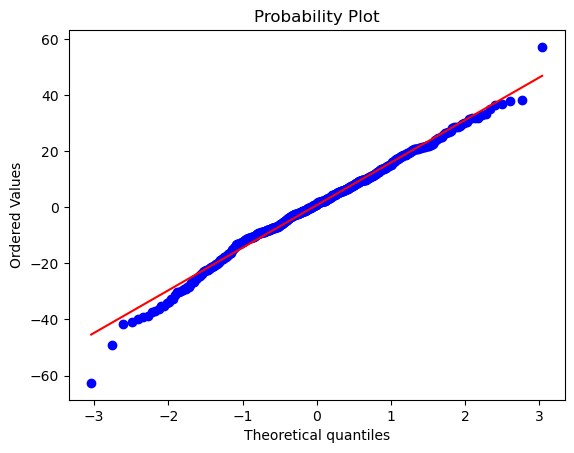

In [30]:
# Fazendo predições

y_pred = model.predict(X_test)

# Checando os resíduos

residue = y_test - y_pred

stats.probplot(residue, dist='norm', plot=pylab)
pylab.show()

In [31]:
# Verificando o enviesamento

residue.skew()

-0.2680802973840358

In [18]:
# Fazendo teste
from scipy.stats import normaltest
    
test_stat, p = normaltest(y_test - y_pred)

# Usando significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")


Rejeição da H_0: amostra não é normal


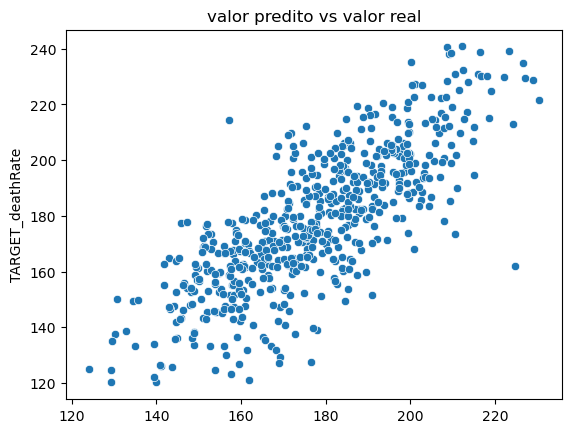

In [19]:
plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.show()

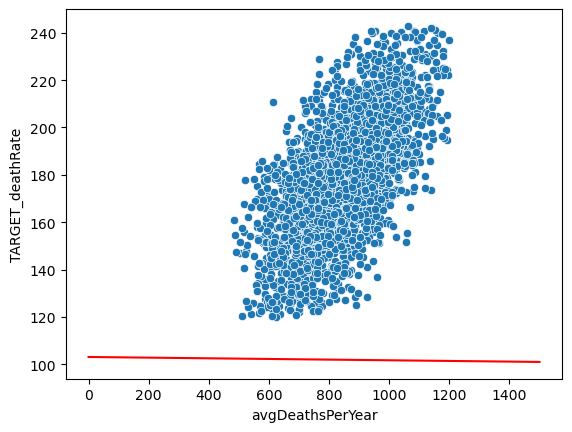

In [33]:
sns.scatterplot(data=df, x='avgDeathsPerYear', y='TARGET_deathRate')
x = np.linspace(0, 1500, 1000)
y = model.intercept_ + model.coef_[0]*x
plt.plot(x, y, color="red")
plt.show()

In [32]:
print('\nR^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred, squared=False))


R^2: 0.6238882479475301
MAE: 11.746073753304731
MSE: 231.07836016932376
RMSE: 15.201261795302512


In [42]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# Ajustando o scaler para os dados de treino
mms.fit(X_train)

# Transformando os dados
X_train_transformed = mms.transform(X_train)
X_test_transformed = mms.transform(X_test)

# Não existe real necessidade de instanciar outro modelo, porém o estou fazendo para separar os modelos
# em variáveis diferentes para melhor compreensão

model_with_scaler = LinearRegression()

# Treinando o modelo
model_with_scaler.fit(X_train_transformed, y_train)

LinearRegression()

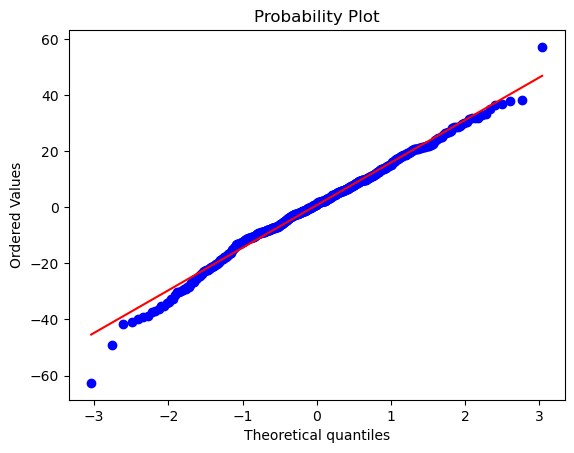

In [43]:
# Fazendo predições

y_pred = model_with_scaler.predict(X_test_transformed)

# Checando os resíduos

residue = y_test - y_pred

stats.probplot(residue, dist='norm', plot=pylab)
pylab.show()

In [44]:
# Verificando enviesamento

residue.skew()

-0.2680802973839293

In [45]:
# Fazendo teste
from scipy.stats import normaltest
    
test_stat, p = normaltest(y_test - y_pred)

# Usando significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")


Rejeição da H_0: amostra não é normal


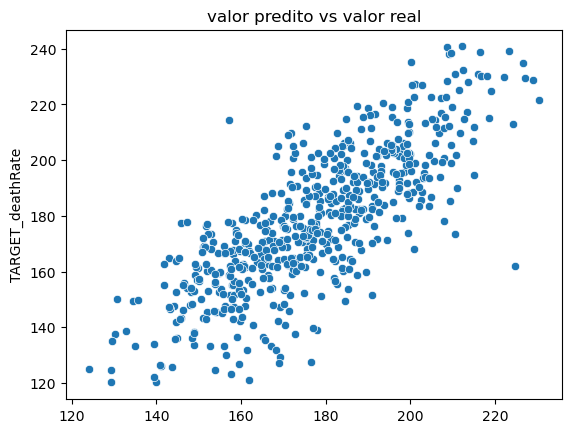

In [46]:
plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.show()

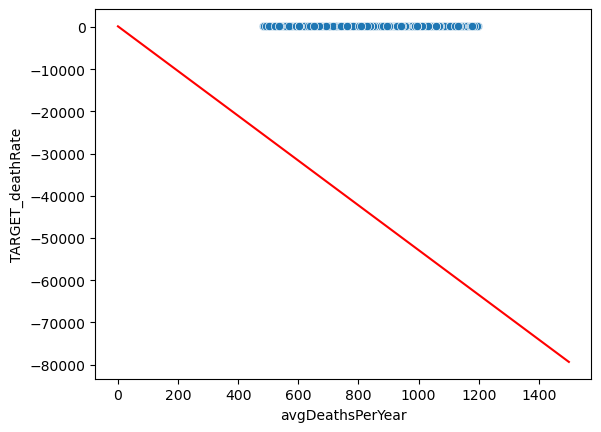

In [47]:
sns.scatterplot(data=df, x='avgDeathsPerYear', y='TARGET_deathRate')
x = np.linspace(0, 1500, 1000)
y = model_with_scaler.intercept_ + model_with_scaler.coef_[0]*x
plt.plot(x, y, color="red")
plt.show()

In [48]:
print('\nR^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred, squared=False))


R^2: 0.6238882479475291
MAE: 11.746073753304747
MSE: 231.07836016932438
RMSE: 15.201261795302532


Conclusão: não houve uma relevância considerável nas métricas de predição entre o modelo escalonado e o modelo não escalonado.
<br>

In [49]:
# Avaliando a importância de cada variável

coeff_df = pd.DataFrame(model.coef_, variables.columns, columns=['Parameter value'])
coeff_df.abs().sort_values(by='Parameter value', ascending=False)

,Parameter value
PctBachDeg25_Over,0.754166
AvgHouseholdSize,0.720744
PctOtherRace,0.680360
PctMarriedHouseholds,0.621984
PctUnemployed16_Over,0.578775
MedianAgeMale,0.543119
BirthRate,0.497629
PercentMarried,0.464434
PctPrivateCoverage,0.275557
PctHS25_Over,0.268630


As variáveis mais importantes são, nessa ordem:

    1. PctBachDeg25_Over: percentual de residentes com 25 anos ou mais que atingiram grau de bacharel
    2. AvgHouseholdSize: tamanho médio da família
    3. PctOtherRace: percentual de residentes que não se identificam como brancos, pretos ou asiáticos
    4. PctMarriedHouseholds: percentual de famílias casadas
    5. PctUnemployed16_Over: percentual de residentes desempregados com 16 ou mais
    6. MedianAgeMale: idade mediana dos residentes homens

Interessante resaltar como a variável que tinha a maior correção com o alvo tem uma importância bem pequena para o modelo.

5. Compare os três modelos desenvolvidos.

**Modelo de regressão simples**

R^2: 0.4311513550982494

MAE: 14.930774801173625

MSE: 349.4934984911096

RMSE: 18.694745210649693

<br>

**Modelo de regressão múltipla**

R^2: 0.6238882479475301

MAE: 11.746073753304731

MSE: 231.07836016932376

RMSE: 15.201261795302512

<br>

**Modelo de regressão múltipla escalonada**

R^2: 0.6238882479475291

MAE: 11.746073753304747

MSE: 231.07836016932438

RMSE: 15.201261795302532

<br>
<br>

Pelas métricas dos modelos, podemos observar:

1. Existe uma diferença relevantemente alta entre o modelo de regressão simples e regressão múltipla
2. O escalonamento é mais interessante, ao menos nesse caso, para avaliação da importância de cada variável, já que, com o escalonamento, elas estão na mesma escala, mas não possui uma relevância para o melhoramento das métricas do modelo
3. Mesmo o melhor modelo ainda não possui um percentual de acerto alto
4. Provavelmente é possível melhorar o modelo, mas isso é algo que não será abordado nessa parte do projeto